<a href="https://colab.research.google.com/github/bear4o4/Student-Score-Prediction/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup and Data Loading


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

import kagglehub


path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)


df = pd.read_csv(f'{path}/StudentPerformanceFactors.csv')


print(df.info())
print(df.head())

Path to dataset files: /kaggle/input/student-performance-factors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-nu

Data Cleaning and Basic Visualization

In [ ]:

print("Missing values before handling:")
print(df.isnull().sum())


for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object':

            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
        else:

            median_value = df[column].median()
            df[column] = df[column].fillna(median_value)


duplicate_count = df.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")


if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicate_count} duplicates")


print("\nData types:")
print(df.dtypes)


print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Number of duplicates: 0

Data types:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64

Data Visualization


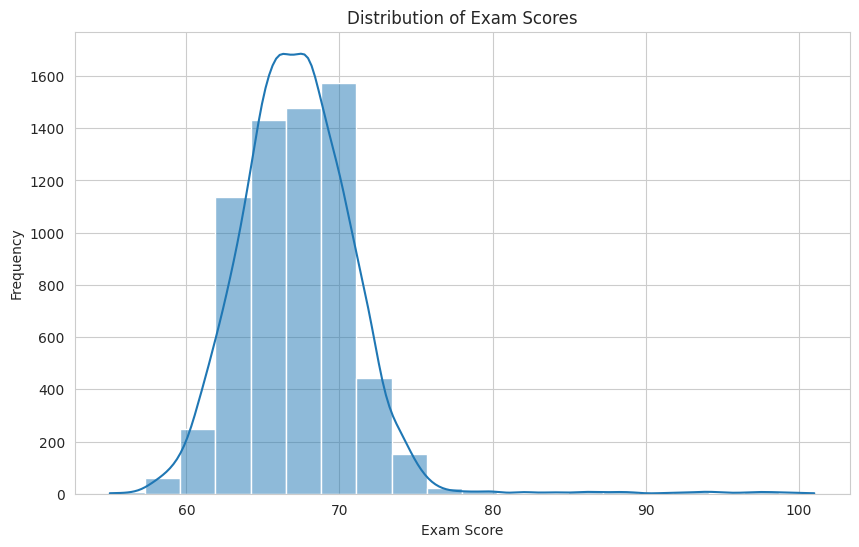

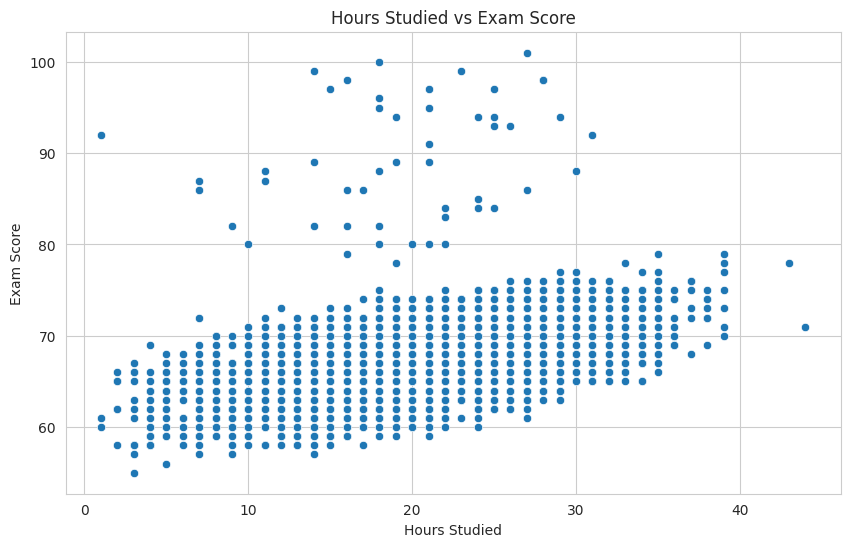

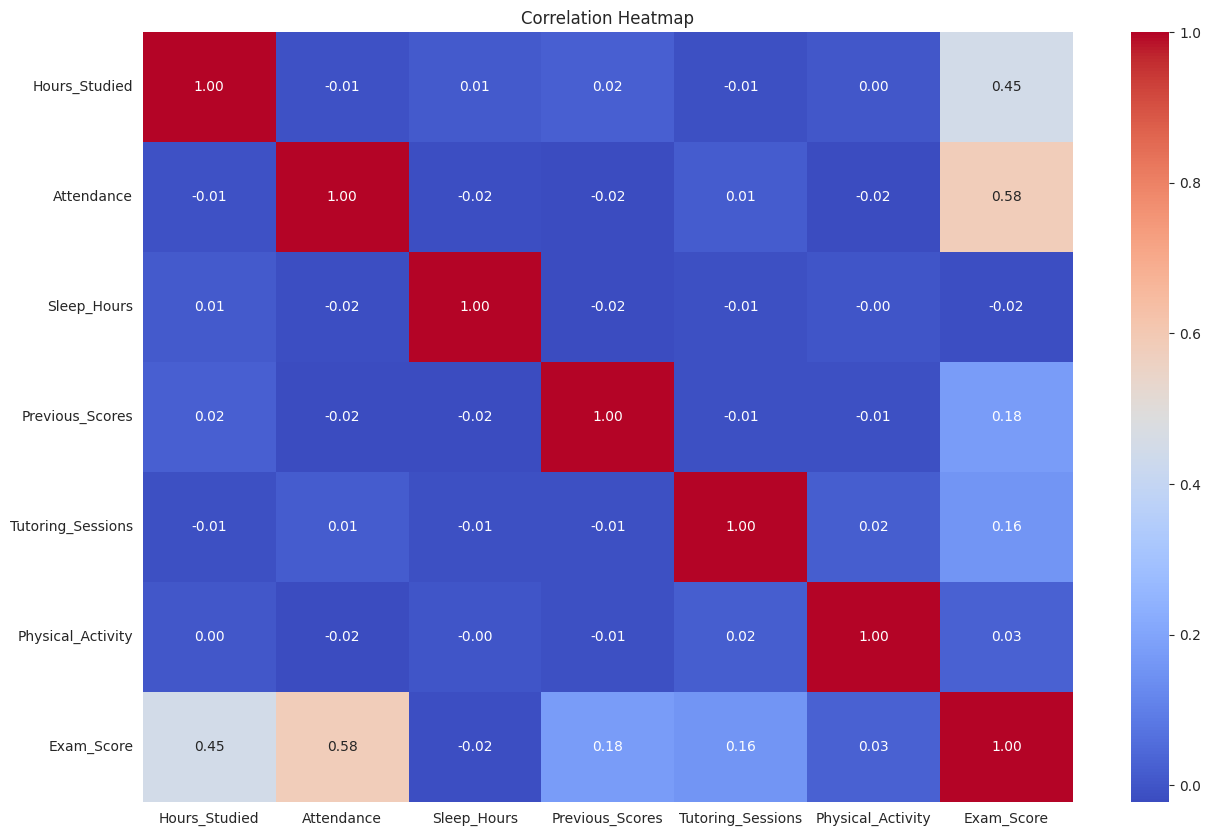

In [ ]:

sns.set_style('whitegrid')


plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()


plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Data Preparation and Train-Test Split


In [ ]:

X = df[['Hours_Studied']]
y = df['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 5285
Testing set size: 1322


Train a Linear Regression Model

Linear Regression Results (with only Hours_Studied):
Intercept: 61.51
Coefficient: 0.29
Mean Squared Error: 10.86
Root Mean Squared Error: 3.29
R-squared: 0.23


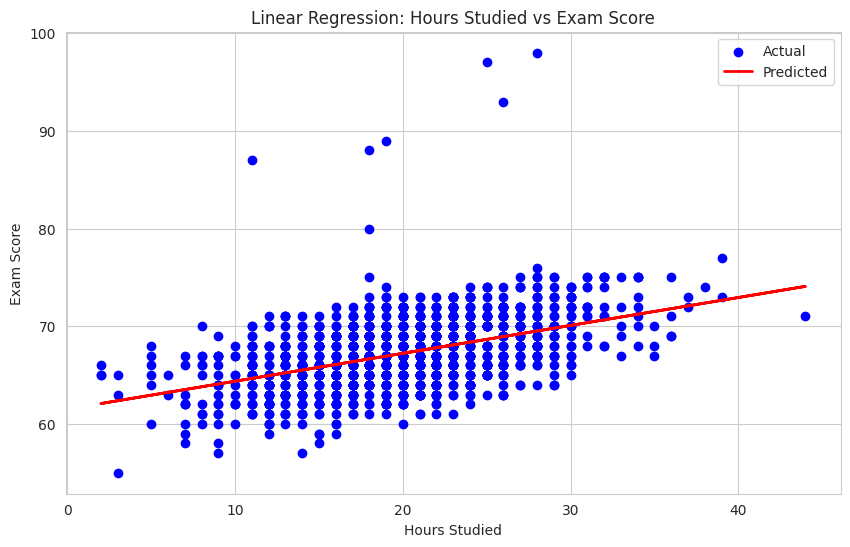

In [ ]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Results (with only Hours_Studied):")
print(f"Intercept: {lr_model.intercept_:.2f}")
print(f"Coefficient: {lr_model.coef_[0]:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

Polynomial Regression


Polynomial Regression Results (degree=2):
Coefficients: [0.         0.23338865 0.00130923]
Intercept: 61.99
Mean Squared Error: 10.84
Root Mean Squared Error: 3.29
R-squared: 0.23


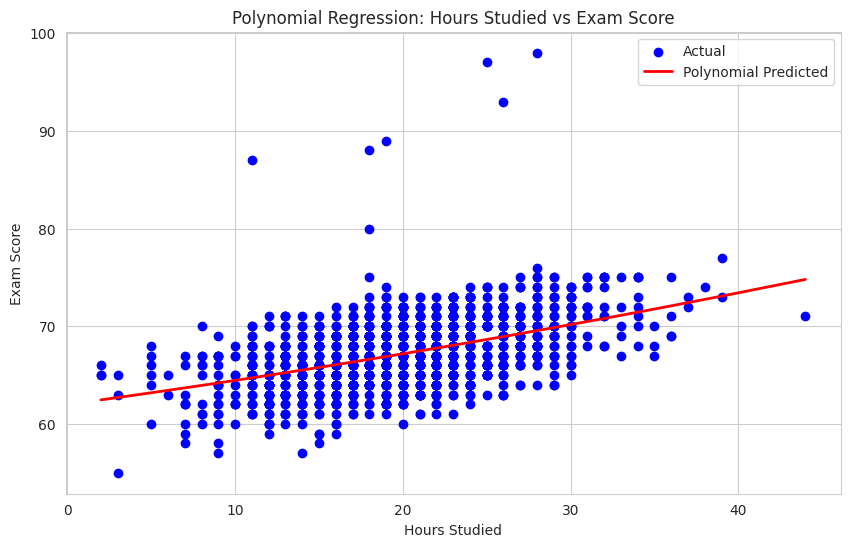

In [ ]:

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)


y_poly_pred = poly_model.predict(X_poly_test)


mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_poly_pred)

print("\nPolynomial Regression Results (degree=2):")
print(f"Coefficients: {poly_model.coef_}")
print(f"Intercept: {poly_model.intercept_:.2f}")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"Root Mean Squared Error: {rmse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')

sorted_zip = sorted(zip(X_test['Hours_Studied'], y_poly_pred))
X_test_sorted, y_poly_pred_sorted = zip(*sorted_zip)
plt.plot(X_test_sorted, y_poly_pred_sorted, color='red', linewidth=2, label='Polynomial Predicted')
plt.title('Polynomial Regression: Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

Experiment with Different Feature Combinations

In [ ]:

def evaluate_features(features):
    X = df[features]
    y = df['Exam_Score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\nFeatures: {features}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")

    return rmse, r2


print("\nEvaluating different feature combinations:")

# 1. Only Hours_Studied
rmse1, r2_1 = evaluate_features(['Hours_Studied'])

# 2. Hours_Studied + Previous_Scores
rmse2, r2_2 = evaluate_features(['Hours_Studied', 'Previous_Scores'])

# 3. Hours_Studied + Previous_Scores + Sleep_Hours
rmse3, r2_3 = evaluate_features(['Hours_Studied', 'Previous_Scores', 'Sleep_Hours'])

# 4. All numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Exam_Score')
rmse4, r2_4 = evaluate_features(numerical_features)


results = pd.DataFrame({
    'Features': [
        'Only Hours_Studied',
        'Hours + Previous Scores',
        'Hours + Previous + Sleep',
        'All numerical features'
    ],
    'RMSE': [rmse1, rmse2, rmse3, rmse4],
    'R-squared': [r2_1, r2_2, r2_3, r2_4]
})

print("\nComparison of different feature combinations:")
print(results.sort_values('R-squared', ascending=False))


Evaluating different feature combinations:

Features: ['Hours_Studied']
RMSE: 3.29
R-squared: 0.23

Features: ['Hours_Studied', 'Previous_Scores']
RMSE: 3.25
R-squared: 0.25

Features: ['Hours_Studied', 'Previous_Scores', 'Sleep_Hours']
RMSE: 3.25
R-squared: 0.25

Features: Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity'],
      dtype='object')
RMSE: 2.25
R-squared: 0.64

Comparison of different feature combinations:
                   Features      RMSE  R-squared
3    All numerical features  2.250657   0.641639
1   Hours + Previous Scores  3.247117   0.254070
2  Hours + Previous + Sleep  3.253046   0.251344
0        Only Hours_Studied  3.294833   0.231987


 Use the Trained Linear Regression Model (Single Feature)

In [ ]:
# Re-train the simple model (if not already done)
# X = df[['Hours_Studied']]
# y = df['Exam_Score']
# lr_model = LinearRegression()
# lr_model.fit(X, y)


def predict_score(hours):

    hours_df = pd.DataFrame({'Hours_Studied': [hours]})
    predicted_score = lr_model.predict(hours_df)
    return predicted_score[0]


study_hours = [2, 4, 6, 8, 10]
print("\nExam Score Predictions:")
print("----------------------")
for hours in study_hours:
    score = predict_score(hours)
    print(f"Predicted exam score for {hours} study hours: {score:.2f}")

Predicted exam score for 2 study hours: 62.08
Predicted exam score for 4 study hours: 62.65
Predicted exam score for 6 study hours: 63.23
Predicted exam score for 8 study hours: 63.80
Predicted exam score for 10 study hours: 64.37


Visualize the Prediction Line

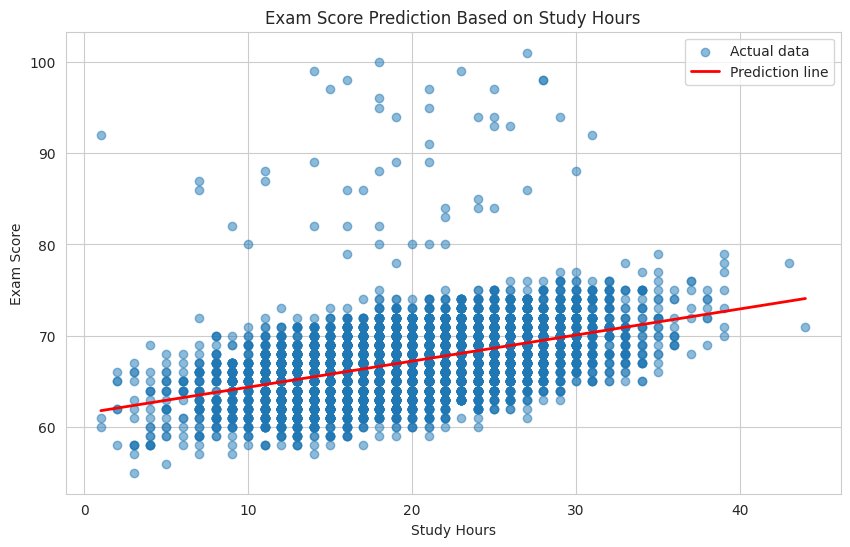

In [ ]:

hours_range = np.linspace(df['Hours_Studied'].min(), df['Hours_Studied'].max(), 100).reshape(-1, 1)
hours_range_df = pd.DataFrame(hours_range, columns=['Hours_Studied'])
predicted_scores = lr_model.predict(hours_range_df)


plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.5, label='Actual data')
plt.plot(hours_range, predicted_scores, color='red', linewidth=2, label='Prediction line')
plt.title('Exam Score Prediction Based on Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

Make Predictions for New Students

In [ ]:

new_students = [
    {'name': 'Alice', 'study_hours': 3.5},
    {'name': 'Bob', 'study_hours': 7.2},
    {'name': 'Charlie', 'study_hours': 5.0}
]

print("\nExam Score Predictions:")
print("----------------------")
for student in new_students:
    prediction = predict_score(student['study_hours'])
    print(f"{student['name']}:")
    print(f"  Study Hours: {student['study_hours']}")
    print(f"  Predicted Exam Score: {prediction:.2f}\n")


Exam Score Predictions:
----------------------
Alice:
  Study Hours: 3.5
  Predicted Exam Score: 62.51

Bob:
  Study Hours: 7.2
  Predicted Exam Score: 63.57

Charlie:
  Study Hours: 5.0
  Predicted Exam Score: 62.94



 Understand the Model Equation

In [ ]:
print(f"Model Equation: Exam Score = {lr_model.intercept_:.2f} + {lr_model.coef_[0]:.2f} × Hours_Studied")

Model Equation: Exam Score = 61.51 + 0.29 × Hours_Studied
